In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
import mygene

# Analysis of TCGA vs GTEx Pairwise Differential Expression 

Using data produced from this experiment: <br>
https://github.com/jvivian/rnaseq-recompute-analysis/blob/master/experiments/pairwise_gtex_vs_tcga.py

In [3]:
def zip_sort(x, y):
    vals = sorted(zip(x, y), key=lambda x: x[1])
    return zip(*vals)

def label_fix(l):
    return [x.replace('_', '\n').capitalize() for x in l]

def write_dict_list(d, directory):
    for x in d:
        if list(d[x]):
            with open(os.path.join(directory, x), 'w') as f:
                f.write('\n'.join(list(d[x])))

### Number of Samples

In [63]:
results = {x: pd.read_csv(os.path.join('tissues', x, 'results.tsv'), sep='\t', index_col=0) for x in os.listdir('tissues')}

In [4]:
df = pd.DataFrame()

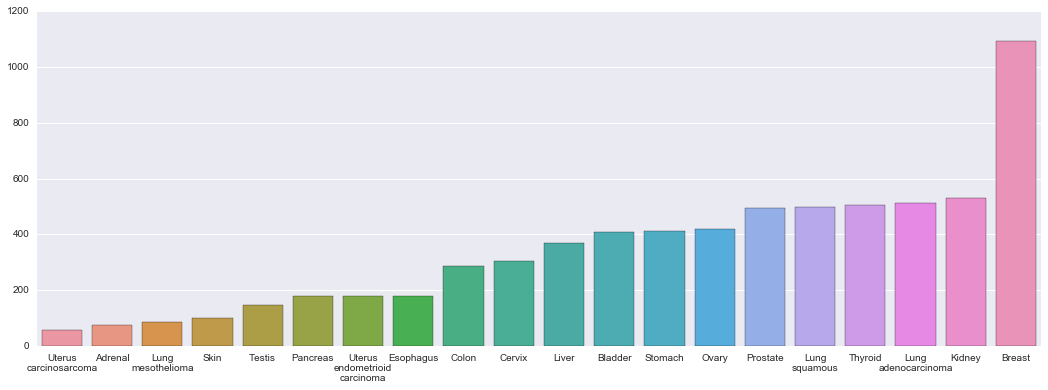

In [23]:
num_samples = [results[x].num_samples[0] for x in sorted(results)]
vector_names = [x.replace('_', '\n').capitalize() for x in sorted(results)]

vector_names, num_samples = zip_sort(vector_names, num_samples)

fig, ax = plt.subplots(figsize=[18, 6])
sns.barplot(vector_names, num_samples, ax=ax);

In [24]:
df['num_samples'] = num_samples
df.index = sorted(results.keys())

### Overlap Map

Create 2D array of percentage overlap between all tissues

In [81]:
def plot_heatmap(results, n=100):
    top_hits = {x: results[x].sort_values('pval').head(n).index for x in results}
    overlap = []
    for tissue in sorted(results):
        overlap.append([float(len(set(top_hits[tissue]).intersection(set(top_hits[x]))))/n for x in df.index])
    overlap = pd.DataFrame(overlap)
    overlap.index = label_fix(df.index)
    overlap.columns = label_fix(df.index)

    # Plot
    fig, ax = plt.subplots(figsize=[12,10])
    sns.heatmap(overlap, ax=ax, cmap='Blues')
    plt.title('Top {} Gene Overlap Between Tissues'.format(n));

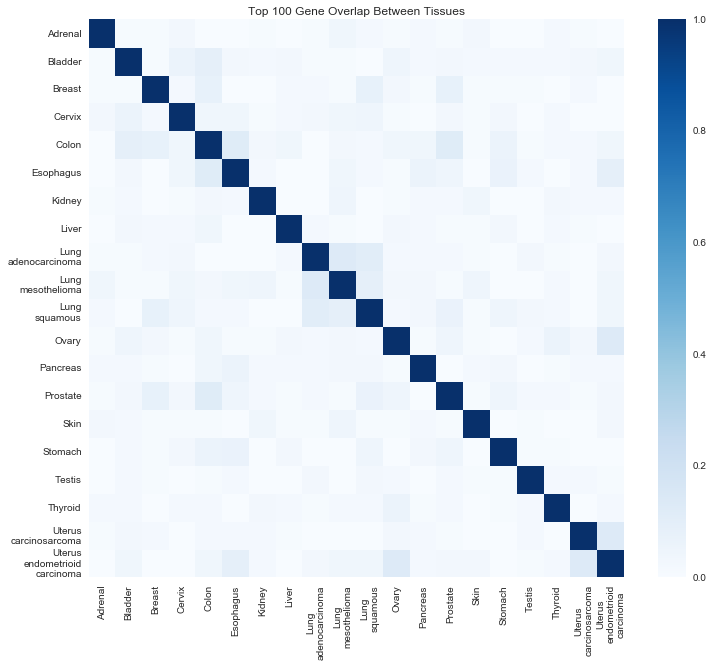

In [92]:
plot_heatmap(results, n=100)

In [93]:
# Save top hits
write_dict_list(top_hits, 'analysis/top-genes/')

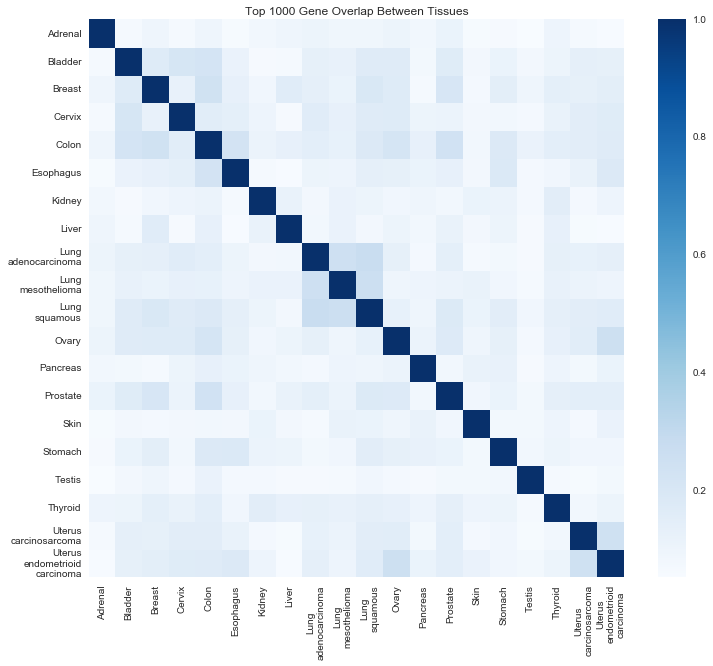

In [83]:
plot_heatmap(results, n=1000)

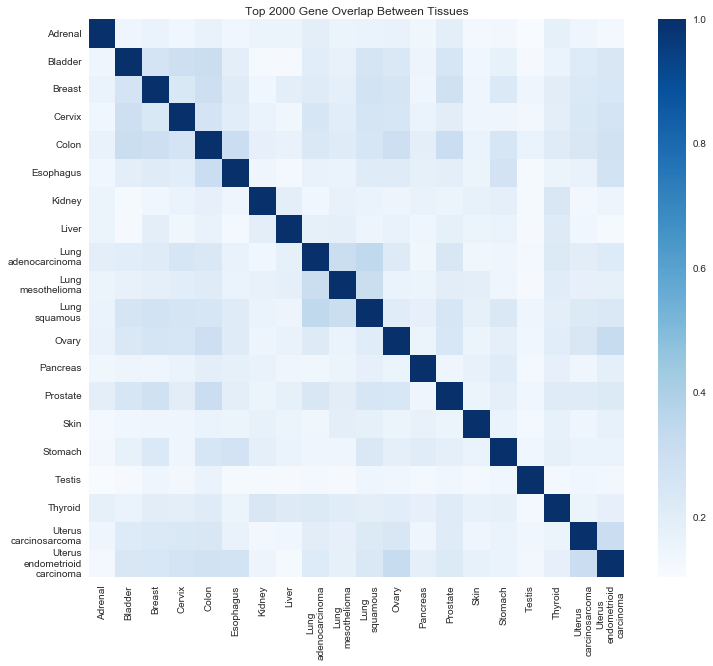

In [91]:
plot_heatmap(results, n=2000)

### Gene Annotation

In [94]:
def get_basic_gene_info(gene_list):
    mg = mygene.MyGeneInfo()
    return mg.querymany(gene_list, 
                        scopes='symbol', 
                        fields='symbol,name,entrezgene,summary', 
                        species='human', 
                        returnall=True, 
                        as_dataframe=True, 
                        size=1)

Save basic information on top hits

In [95]:
for t in top_hits:
    basic_info = get_basic_gene_info(top_hits[t])
    basic_info['out'].to_csv('analysis/annotations/' + t, sep='\t')

querying 1-100...done.
Finished.
1 input query terms found no hit:
	[u'LECT1']
querying 1-100...done.
Finished.
querying 1-100...done.
Finished.
1 input query terms found no hit:
	[u'ASUN']
querying 1-100...done.
Finished.
2 input query terms found no hit:
	[u'BZRAP1', u'SELT']
querying 1-100...done.
Finished.
querying 1-100...done.
Finished.
1 input query terms found no hit:
	[u'RP11-477N12.3']
querying 1-100...done.
Finished.
querying 1-100...done.
Finished.
4 input query terms found no hit:
	[u'PVRL1', u'PRUNE', u'TOMM70A', u'ERO1L']
querying 1-100...done.
Finished.
2 input query terms found no hit:
	[u'RP11-574K11.31', u'C17orf85']
querying 1-100...done.
Finished.
1 input query terms found no hit:
	[u'PPAP2A']
querying 1-100...done.
Finished.
1 input query terms found no hit:
	[u'RP11-574K11.31']
querying 1-100...done.
Finished.
querying 1-100...done.
Finished.
2 input query terms found no hit:
	[u'PVRL4', u'MLLT4']
querying 1-100...done.
Finished.
querying 1-100...done.
Finished.


### Analysis of Genes between Pairwise and Matched

In [108]:
matched = {x: [y.strip() for y in open(os.path.join('../tcga-matched/analysis/top-genes/', x)).readlines()] for x in os.listdir('../tcga-matched/analysis/top-genes/')}
pairwise = {x: [y.strip() for y in open(os.path.join('analysis/top-genes/', x)).readlines()] for x in os.listdir('analysis/top-genes/')}

In [112]:
for x in sorted(matched):
    print x, set(matched[x]).intersection(set(pairwise[x]))

bladder set([])
breast set(['PFN2'])
cervix set([])
colon set([])
esophagus set(['WASF3'])
kidney set([])
liver set([])
lung_adenocarcinoma set([])
lung_squamous set(['PFN2'])
pancreas set(['ERO1LB'])
prostate set([])
stomach set(['AKR1B1'])
thyroid set([])
uterus_endometrioid_carcinoma set([])
